#  Simple Neural Network

In [11]:
import pandas as pd
import seaborn as sns
import tensorflow as tf

#ignore warnings
import warnings
warnings.filterwarnings('ignore') #ide warning for clean output

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Steps  before creating the neural network (Preprocess the Data)

In [13]:
#load the titanic dataset
titanic= sns.load_dataset('titanic')

#preprocessing
# dropping rows with missing 'age', 'embarked' values
titanic.dropna(subset=['age', 'embarked'], inplace=True)

#converting categorical variables to dummy variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who', 'deck'], drop_first=True)

#select features and target
X= titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y= titanic['survived']

#rain test split the data
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=42)

#standardize the data
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)





In [14]:
X_train.shape

(569, 18)

In [15]:
X_train.shape[1]

18

In [16]:
# Building the model

#define the layers of the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],))  #input layer
#hidden_layer1 = tf.keras.layers.Dense(10, activation='relu')  #hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') #output layer

#create the model 
model = tf.keras.Sequential([input_layer, output_layer])

#combine the layers into the model
model.compile(optimizer='adam',
            loss='binary_crossentropy', 
            metrics=['accuracy'])


In [17]:
# Training the model

model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64)



Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3040 - loss: 0.9177  
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3357 - loss: 0.8702 
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3691 - loss: 0.8291 
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4060 - loss: 0.7921 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4974 - loss: 0.7594 
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5167 - loss: 0.7308 
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5308 - loss: 0.7055 
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5518 - loss: 0.6831 
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5764 - loss: 0.6627 
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6063 - loss: 0.6438 
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6380 - loss: 0.6274 
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6661 - lo

In [18]:
#Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.3f}%')
print(f'Test Loss:{loss:.3f}%')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8042 - loss: 0.4611 
Test Accuracy: 0.804%
Test Loss:0.461%


In [19]:
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#warnings
import warnings
warnings.filterwarnings('ignore')

#load the dataset

df= sns.load_dataset('titanic')

#preprocessing
#dropping rows with age and embarked missing values
df.dropna(subset=['age','embarked'], inplace=True)

# converting categorical variables into dummy vaiables
df = pd.get_dummies(df, columns=['sex', 'embarked', 'class', 'who','deck'], drop_first=True)

#slect the features and the target
X= df.drop(['survived','alive', 'embark_town','adult_male','alone'], axis=1)
y=df['survived']


# split the data
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#standardoze the data
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#build the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)) 
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

#create the model
model = tf.keras.Sequential([input_layer, output_layer])


#combine the model
model.compile(optimizer = 'adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

#train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(X_test, y_test))

#evaluate the model
loss, accuracy =model.evaluate(X_test, y_test, verbose=1)
print(f'Test Acuracy:{accuracy:.2f}%')
print(f'Test loss: {loss:.2f}%')



Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4552 - loss: 0.7755 - val_accuracy: 0.4336 - val_loss: 0.7884
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5571 - loss: 0.7348 - val_accuracy: 0.4545 - val_loss: 0.7599
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6204 - loss: 0.6982 - val_accuracy: 0.5664 - val_loss: 0.7336
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6784 - loss: 0.6648 - val_accuracy: 0.6713 - val_loss: 0.7102
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7135 - loss: 0.6363 - val_accuracy: 0.6923 - val_loss: 0.6889
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7276 - loss: 0.6098 - val_accuracy: 0.6853 - val_loss: 0.6701
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7557 - loss: 0.5857 - val_accuracy: 0.6853 - val_loss: 0.6530
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7715 - loss: 0.5642 - val_accuracy: 0.6853 - val_loss: 0.6370


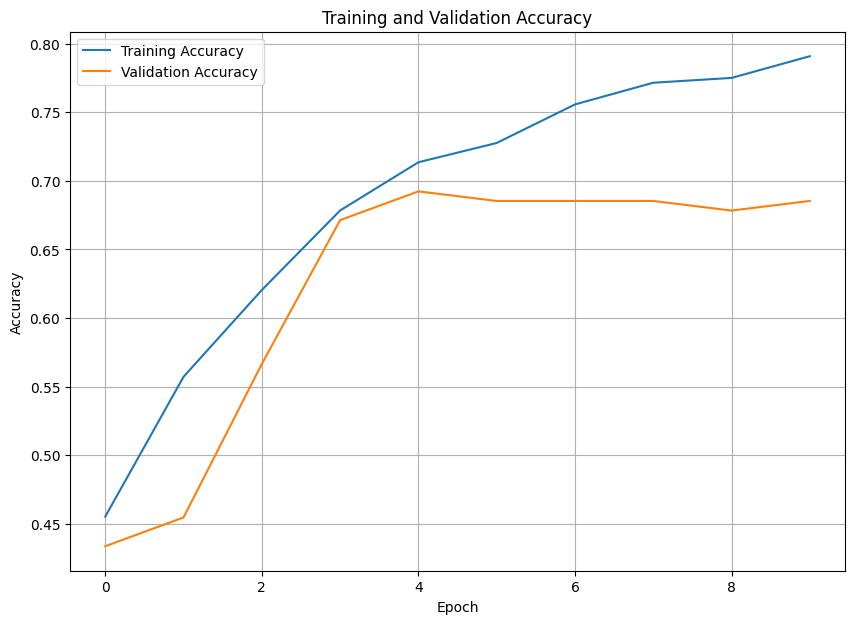

In [20]:
# plot the  loss and accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
# Get accuracy values from training history
train_acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']
#Plot
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()





In [1]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please upd

Python Platform: Windows-10-10.0.19045-SP0
Tensor Flow Version: 2.20.0-rc0

Python 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]
Pandas 2.3.1
Scikit-Learn 1.7.0
SciPy 1.16.0
GPU is NOT AVAILABLE
